<a href="https://colab.research.google.com/github/sarjakpatel/SJSU/blob/main/CMPE%20258/Assignment%204/CMPE_258_Assignment_4D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CMPE 258 Assignment 4D: Training Deep Neural Networks

## Importing the Libraries

In [1]:
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib as mpl
import matplotlib.pyplot as plt

np.random.seed(42)
tf.random.set_seed(42)


%matplotlib inline
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# PROJECT_ROOT_DIR = "."
# CHAPTER_ID = "deep"
# IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# os.makedirs(IMAGES_PATH, exist_ok=True)

# def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
#     path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
#     print("Saving figure", fig_id)
#     if tight_layout:
#         plt.tight_layout()
#     plt.savefig(path, format=fig_extension, dpi=resolution)

## Loading the Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0 # Scaling the data 
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

## Activation Functions

### 1. Leaky Relu Activation

In [3]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.LeakyReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [4]:
#Compiling the built model
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [5]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/15
1719/1719 [==============================] - 11s 6ms/step - loss: 1.2819 - accuracy: 0.6229 - val_loss: 0.8886 - val_accuracy: 0.7160
Epoch 2/15
1719/1719 [==============================] - 9s 5ms/step - loss: 0.7955 - accuracy: 0.7361 - val_loss: 0.7130 - val_accuracy: 0.7656
Epoch 3/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6816 - accuracy: 0.7721 - val_loss: 0.6427 - val_accuracy: 0.7900
Epoch 4/15
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6217 - accuracy: 0.7944 - val_loss: 0.5900 - val_accuracy: 0.8064
Epoch 5/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5832 - accuracy: 0.8074 - val_loss: 0.5582 - val_accuracy: 0.8200
Epoch 6/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5553 - accuracy: 0.8156 - val_loss: 0.5350 - val_accuracy: 0.8238
Epoch 7/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5339 - accuracy: 0.8223 - val_loss: 0.5156 - val_accuracy

### 2. PReLu 

In [6]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(100, kernel_initializer="he_normal"),
    keras.layers.PReLU(),
    keras.layers.Dense(10, activation="softmax")
])

In [7]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [8]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/15
1719/1719 [==============================] - 9s 5ms/step - loss: 1.3337 - accuracy: 0.6140 - val_loss: 0.8951 - val_accuracy: 0.7192
Epoch 2/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8048 - accuracy: 0.7413 - val_loss: 0.7103 - val_accuracy: 0.7742
Epoch 3/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6849 - accuracy: 0.7771 - val_loss: 0.6405 - val_accuracy: 0.7962
Epoch 4/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6237 - accuracy: 0.7942 - val_loss: 0.5859 - val_accuracy: 0.8122
Epoch 5/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5846 - accuracy: 0.8073 - val_loss: 0.5542 - val_accuracy: 0.8192
Epoch 6/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5567 - accuracy: 0.8146 - val_loss: 0.5315 - val_accuracy: 0.8246
Epoch 7/15
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5352 - accuracy: 0.8205 - val_loss: 0.5121 - val_accuracy:

### 3. SeLu

In [9]:
# Scaling the data such that the mean is 0 and a unit(1) standard deviation

pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [10]:
# Inside the sequential layer, we will add about 50 dense layers with "selu" activation function 
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="selu",
                             kernel_initializer="lecun_normal"))
for layer in range(50):
    model.add(keras.layers.Dense(100, activation="selu",
                                 kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [12]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid))

Epoch 1/15
1719/1719 [==============================] - 21s 11ms/step - loss: 0.7601 - accuracy: 0.7322 - val_loss: 0.5513 - val_accuracy: 0.8068
Epoch 2/15
1719/1719 [==============================] - 19s 11ms/step - loss: 0.5045 - accuracy: 0.8212 - val_loss: 0.4746 - val_accuracy: 0.8338
Epoch 3/15
1719/1719 [==============================] - 19s 11ms/step - loss: 0.4414 - accuracy: 0.8435 - val_loss: 0.4572 - val_accuracy: 0.8394
Epoch 4/15
1719/1719 [==============================] - 18s 11ms/step - loss: 0.4021 - accuracy: 0.8570 - val_loss: 0.4247 - val_accuracy: 0.8550
Epoch 5/15
1719/1719 [==============================] - 18s 11ms/step - loss: 0.3734 - accuracy: 0.8668 - val_loss: 0.4008 - val_accuracy: 0.8584
Epoch 6/15
1719/1719 [==============================] - 18s 10ms/step - loss: 0.3512 - accuracy: 0.8736 - val_loss: 0.4058 - val_accuracy: 0.8546
Epoch 7/15
1719/1719 [==============================] - 18s 10ms/step - loss: 0.3343 - accuracy: 0.8794 - val_loss: 0.3858 -

# Batch Normalization
 It is a process to make neural networks faster and more stable through adding extra layers in a deep neural network. It also is responsible for reducing the number of epochs required to train the model

In [13]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [14]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [15]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 1.0458 - accuracy: 0.6706 - val_loss: 0.6620 - val_accuracy: 0.7872
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6663 - accuracy: 0.7865 - val_loss: 0.5500 - val_accuracy: 0.8174
Epoch 3/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.5897 - accuracy: 0.8055 - val_loss: 0.4979 - val_accuracy: 0.8326
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.5401 - accuracy: 0.8186 - val_loss: 0.4654 - val_accuracy: 0.8432
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5070 - accuracy: 0.8266 - val_loss: 0.4437 - val_accuracy: 0.8516
Epoch 6/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4863 - accuracy: 0.8337 - val_loss: 0.4260 - val_accuracy: 0.8546
Epoch 7/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4691 - accuracy: 0.8385 - val_loss: 0.4124 - val_ac

## Gradient Clipping

In [16]:
optimizer = keras.optimizers.SGD(clipnorm=1.0)

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [18]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3,clipvalue=1.0),
              metrics=["accuracy"])

In [19]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 1.0271 - accuracy: 0.6732 - val_loss: 0.6729 - val_accuracy: 0.7870
Epoch 2/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.6789 - accuracy: 0.7816 - val_loss: 0.5545 - val_accuracy: 0.8168
Epoch 3/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5960 - accuracy: 0.8023 - val_loss: 0.4983 - val_accuracy: 0.8334
Epoch 4/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.5449 - accuracy: 0.8178 - val_loss: 0.4635 - val_accuracy: 0.8420
Epoch 5/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.5095 - accuracy: 0.8275 - val_loss: 0.4404 - val_accuracy: 0.8486
Epoch 6/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4871 - accuracy: 0.8330 - val_loss: 0.4221 - val_accuracy: 0.8530
Epoch 7/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4700 - accuracy: 0.8385 - val_loss: 0.4088 - val_ac

#Optimizers

In [20]:
# Adams Optimizer
optimizer = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [21]:
#Nadam Optimizer
optimizer = keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [22]:
#RMSProp Optimizer
optimizer = keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9)

In [23]:
#Adamax Optimizer
optimizer = keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

# Learning Rate Scheduling

1) Power scheduling (decay  = le-4)

In [24]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

In [26]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [27]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4894 - accuracy: 0.8276 - val_loss: 0.3970 - val_accuracy: 0.8652
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3789 - accuracy: 0.8661 - val_loss: 0.3683 - val_accuracy: 0.8754
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3453 - accuracy: 0.8775 - val_loss: 0.3727 - val_accuracy: 0.8714
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3240 - accuracy: 0.8838 - val_loss: 0.3448 - val_accuracy: 0.8776
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3090 - accuracy: 0.8896 - val_loss: 0.3400 - val_accuracy: 0.8784
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2953 - accuracy: 0.8947 - val_loss: 0.3392 - val_accuracy: 0.8834
Epoch 7/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.2853 - accuracy: 0.8982 - val_loss: 0.3336 - val_accuracy:

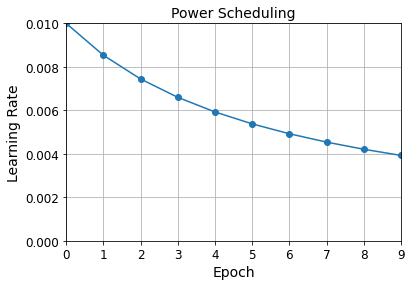

In [28]:
import math

learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = math.ceil(len(X_train) / batch_size)
epochs = np.arange(10)
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, 9, 0, 0.01])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

2) Piecewise constant scheduling

The function returns a 1-arg callable to compute the piecewise constant when passed the current optimizer step. This can be useful for changing the learning rate value across different invocations of optimizer functions.

Example: use a learning rate that's 1.0 for the first 100001 steps, 0.5 for the next 10000 steps, and 0.1 for any additional steps.

In [29]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [30]:
def piecewise_constant(boundaries, values):
    boundaries = np.array([0] + boundaries)
    values = np.array(values)
    def piecewise_constant_fn(epoch):
        return values[np.argmax(boundaries > epoch) - 1]
    return piecewise_constant_fn

piecewise_constant_fn = piecewise_constant([5, 15], [0.01, 0.005, 0.001])

In [31]:
lr_scheduler = keras.callbacks.LearningRateScheduler(piecewise_constant_fn)


model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

In [32]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [33]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

Epoch 1/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.8335 - accuracy: 0.7575 - val_loss: 0.8540 - val_accuracy: 0.7186 - lr: 0.0100
Epoch 2/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.8559 - accuracy: 0.7580 - val_loss: 0.6811 - val_accuracy: 0.7972 - lr: 0.0100
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.9010 - accuracy: 0.7337 - val_loss: 1.3213 - val_accuracy: 0.6222 - lr: 0.0100
Epoch 4/10
1719/1719 [==============================] - 12s 7ms/step - loss: 1.0198 - accuracy: 0.6313 - val_loss: 1.0615 - val_accuracy: 0.6816 - lr: 0.0100
Epoch 5/10
1719/1719 [==============================] - 11s 7ms/step - loss: 1.0605 - accuracy: 0.6257 - val_loss: 1.1368 - val_accuracy: 0.6012 - lr: 0.0100
Epoch 6/10
1719/1719 [==============================] - 11s 7ms/step - loss: 0.8247 - accuracy: 0.6766 - val_loss: 0.8110 - val_accuracy: 0.6992 - lr: 0.0050
Epoch 7/10
1719/1719 [==============================

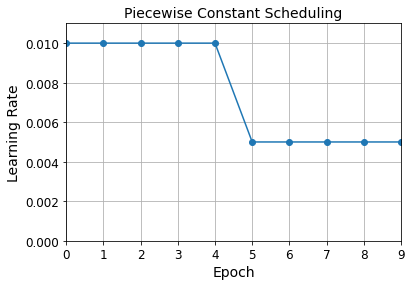

In [34]:
plt.plot(history.epoch, [piecewise_constant_fn(epoch) for epoch in history.epoch], "o-")
plt.axis([0, 9, 0, 0.011])
plt.xlabel("Epoch")
plt.ylabel("Learning Rate")
plt.title("Piecewise Constant Scheduling", fontsize=14)
plt.grid(True)
plt.show()

3) Performance Scheduling

In [35]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.Dense(10, activation="softmax")
])

In [36]:
optimizer = keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)

In [37]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [38]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid), callbacks=[lr_scheduler])

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5926 - accuracy: 0.8057 - val_loss: 0.4606 - val_accuracy: 0.8488 - lr: 0.0200
Epoch 2/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4928 - accuracy: 0.8399 - val_loss: 0.6015 - val_accuracy: 0.8338 - lr: 0.0200
Epoch 3/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5143 - accuracy: 0.8431 - val_loss: 0.4818 - val_accuracy: 0.8576 - lr: 0.0200
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5089 - accuracy: 0.8482 - val_loss: 0.4870 - val_accuracy: 0.8612 - lr: 0.0200
Epoch 5/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5111 - accuracy: 0.8507 - val_loss: 0.5310 - val_accuracy: 0.8416 - lr: 0.0200
Epoch 6/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4907 - accuracy: 0.8570 - val_loss: 0.6706 - val_accuracy: 0.8494 - lr: 0.0200
Epoch 7/10
1719/1719 [==============================] - 6s

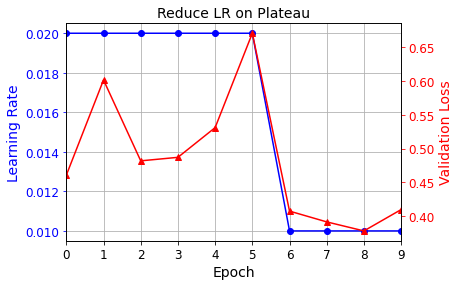

In [39]:
plt.plot(history.epoch, history.history["lr"], "bo-")
plt.xlabel("Epoch")
plt.ylabel("Learning Rate", color='b')
plt.tick_params('y', colors='b')
plt.gca().set_xlim(0, 9)
plt.grid(True)

ax2 = plt.gca().twinx()
ax2.plot(history.epoch, history.history["val_loss"], "r^-")
ax2.set_ylabel('Validation Loss', color='r')
ax2.tick_params('y', colors='r')

plt.title("Reduce LR on Plateau", fontsize=14)
plt.show()

# Regularization

$\ell_1$ and $\ell_2$ regularization

In [40]:
layer = keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=keras.regularizers.l2(0.01))

In [41]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(100, activation="elu",
                       kernel_initializer="he_normal",
                       kernel_regularizer=keras.regularizers.l2(0.01)),
    keras.layers.Dense(10, activation="softmax",
                       kernel_regularizer=keras.regularizers.l2(0.01))
])

In [42]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [43]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 15s 8ms/step - loss: 1.6286 - accuracy: 0.8109 - val_loss: 0.7192 - val_accuracy: 0.8294
Epoch 2/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.7182 - accuracy: 0.8272 - val_loss: 0.6815 - val_accuracy: 0.8372
Epoch 3/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.6988 - accuracy: 0.8329 - val_loss: 0.6981 - val_accuracy: 0.8358
Epoch 4/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.6934 - accuracy: 0.8367 - val_loss: 0.6731 - val_accuracy: 0.8478
Epoch 5/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.6900 - accuracy: 0.8384 - val_loss: 0.6618 - val_accuracy: 0.8510
Epoch 6/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.6870 - accuracy: 0.8382 - val_loss: 0.6627 - val_accuracy: 0.8496
Epoch 7/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.6856 - accuracy: 0.8386 - val_loss: 0.6583 - val_ac

# Dropout

We will now add dropout layer while creating a sequential model

In [44]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

In [45]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [46]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.5692 - accuracy: 0.8031 - val_loss: 0.3800 - val_accuracy: 0.8600
Epoch 2/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4201 - accuracy: 0.8463 - val_loss: 0.3346 - val_accuracy: 0.8728
Epoch 3/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3883 - accuracy: 0.8561 - val_loss: 0.3384 - val_accuracy: 0.8742
Epoch 4/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3735 - accuracy: 0.8631 - val_loss: 0.3194 - val_accuracy: 0.8834
Epoch 5/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3614 - accuracy: 0.8650 - val_loss: 0.3038 - val_accuracy: 0.8858
Epoch 6/10
1719/1719 [==============================] - 12s 7ms/step - loss: 0.3488 - accuracy: 0.8702 - val_loss: 0.3104 - val_accuracy: 0.8840
Epoch 7/10
1719/1719 [==============================] - 13s 7ms/step - loss: 0.3397 - accuracy: 0.8741 - val_loss: 0.3166 - val_ac

In [47]:
# Loss and Accuracy
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3347 - accuracy: 0.8828


[0.3347319960594177, 0.8827999830245972]

Alpha Dropout

In [48]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

In [49]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)

In [50]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [51]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.6637 - accuracy: 0.7614 - val_loss: 0.5877 - val_accuracy: 0.8420
Epoch 2/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5598 - accuracy: 0.7949 - val_loss: 0.5439 - val_accuracy: 0.8420
Epoch 3/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5302 - accuracy: 0.8046 - val_loss: 0.5062 - val_accuracy: 0.8564
Epoch 4/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.5055 - accuracy: 0.8122 - val_loss: 0.4846 - val_accuracy: 0.8630
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4970 - accuracy: 0.8167 - val_loss: 0.4595 - val_accuracy: 0.8618
Epoch 6/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4792 - accuracy: 0.8213 - val_loss: 0.4732 - val_accuracy: 0.8606
Epoch 7/10
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4696 - accuracy: 0.8269 - val_loss: 0.4868 - val_accuracy:

In [52]:
# Loss and Accuracy
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.5258 - accuracy: 0.8493


[0.5258005857467651, 0.8493000268936157]

Max Norm

In [53]:
layer = keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal",
                           kernel_constraint=keras.constraints.max_norm(1.))

In [54]:
from functools import partial

MaxNormDense = partial(keras.layers.Dense,
                       activation="selu", kernel_initializer="lecun_normal",
                       kernel_constraint=keras.constraints.max_norm(1.))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    MaxNormDense(300),
    MaxNormDense(100),
    keras.layers.Dense(10, activation="softmax")
])

In [55]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [56]:
history = model.fit(X_train_scaled, y_train, epochs=10, validation_data=(X_valid_scaled, y_valid))

Epoch 1/10
1719/1719 [==============================] - 14s 8ms/step - loss: 0.4759 - accuracy: 0.8333 - val_loss: 0.3841 - val_accuracy: 0.8628
Epoch 2/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3537 - accuracy: 0.8704 - val_loss: 0.3704 - val_accuracy: 0.8714
Epoch 3/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3278 - accuracy: 0.8796 - val_loss: 0.3571 - val_accuracy: 0.8694
Epoch 4/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3180 - accuracy: 0.8829 - val_loss: 0.3459 - val_accuracy: 0.8740
Epoch 5/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3099 - accuracy: 0.8855 - val_loss: 0.3301 - val_accuracy: 0.8808
Epoch 6/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3075 - accuracy: 0.8856 - val_loss: 0.3399 - val_accuracy: 0.8806
Epoch 7/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3059 - accuracy: 0.8865 - val_loss: 0.3541 - val_ac